In [1]:
# Jupyter Notebook에서 경고 메시지 숨기기
# Jupyter Notebook을 사용하다 보면 향후 버전이 올라갈 때 변경될 사항을 알려주는 경고 메시지가 거슬릴 때가 있다.
# 이럴 때 warnings 라이브러리를 사용한다.
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 무시하고 숨긴다.
# warnings.filterwarnings('default') # 경고 메시지를 다시 표시한다.

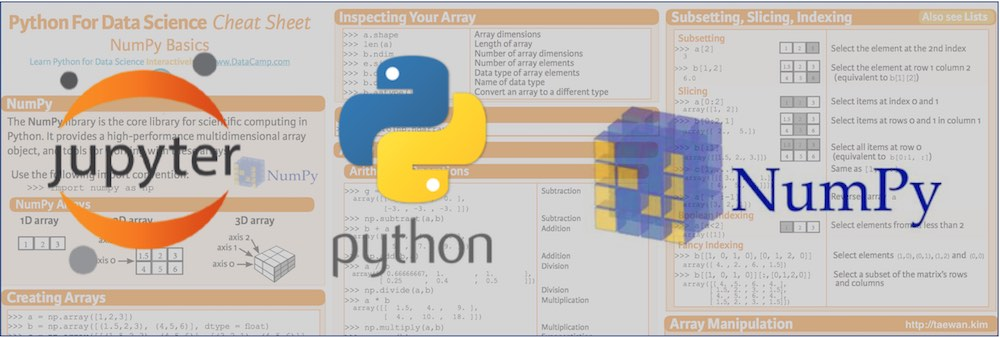

In [2]:
from IPython.display import Image # Jupyter Notebook에 이미지를 표시한다.
Image('./numpyImage/numpyImage00.jpg', width='1000')

파이썬 기반 데이터 분석 환경에서 numpy는 행렬 연산을 위한 핵심 라이브러리이다.  
numpy는 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공하고 특히 메모리 버퍼에 배열 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공한다.  
파이썬 list 객체를 개선한 numpy의 ndarray 객체를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있다.  

numpy의 특징  
&nbsp;&nbsp;1. 강력한 n차원 배열 객체  
&nbsp;&nbsp;2. 정교한 브로드캐스팅(다대일 연산) 기능  
&nbsp;&nbsp;3. c/c++ 및 fortran 코드 통합 도구  
&nbsp;&nbsp;4. 유연한 선형 대수학, 푸리에 변환 및 난수 기능  
&nbsp;&nbsp;5. 범용적 데이터 처리에 사용 가능한 다차원 컨테이너

numpy 데이터 타입

In [3]:
# numpy는 다음과 같은 데이터 타입을 지원하고 배열을 생성할 때 dtype 속성으로 아래와 같은 데이터 타입을 지정할 수 있다.
# np.int64 : 64비트 정수 타입
# np.float32 : 32비트 실수(부동 소수점 소수) 타입
# np.complex : 복소수(128비트 float) 타입
# np.bool : 불린(논리값, True, False) 타입
# np.object : 파이썬 객체 타입
# np.string_ : 스트링 타입
# np.unicode_ : 유니코드 타입

In [4]:
import numpy as np
print(np.__version__) # __version__ : 라이브러리의 버전을 얻어온다.

1.19.5


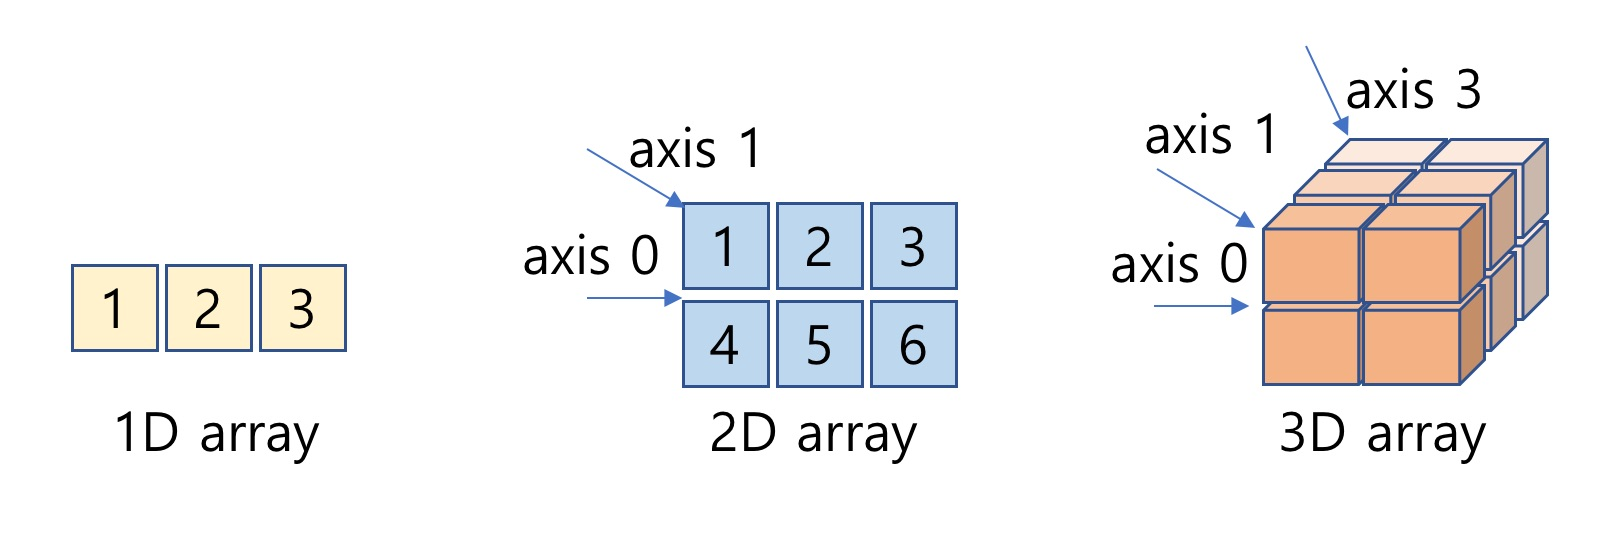

In [5]:
# numpy는 다차원 배열을 지원하고 numpy 배열의 구조는 shape으로 표현한다.
# shape은 배열의 구조를 튜플 자료형을 사용해서 정의한다.
# 예를 들면 28 * 28 컬러 사진은 폭이 28, 높이가 28, 각 픽셀은 3개의 채널(RGB)로 구성된 구조를 가진다. 따라서 컬러 사진의
# 데이터 구조는 shape(28, 28, 3)인 3차원 배열이 된다.
# 다차원 배열은 입체적인 구조를 가지며 데이터의 차원은 여러 갈래의 데이터 방행(axis)을 가진다.
# 다차원 배열의 데이터 방향은 axis로 표현하고 면은 axis = 0, 행은 axis = 1, 열은 axis = 2로 지정한다.
Image('./numpyImage/numpyImage01.jpg', width='1000')

In [6]:
# numpy 배열 객체 정보 출력용으로 사용할 함수를 정의한다.
def pprint(arr):
    print('type : {}'.format(type(arr)))
    print('shape : {}, dimension : {}, dtype : {}'.format(arr.shape, arr.ndim, arr.dtype))
    print('numpy 배열의 데이터\n', arr)

In [7]:
# 파이썬 list 객체로 numpy 배열을 생성할 수 있다.
# 인수로 list 객체와 데이터의 타입(dtype)을 입력해 numpy 배열을 생성하고 dtype을 생략할 경우 입력되는 list 객체의 타입으로
# 설정된다.

In [8]:
# 파이썬 1차원 list로 numpy 배열 만들기
arr = [1, 2, 3]
print(type(arr))
# array() 메소드는 인수로 list 객체를 넘겨받아 numpy 배열을 만든다.
a = np.array(arr)
pprint(a)

<class 'list'>
type : <class 'numpy.ndarray'>
shape : (3,), dimension : 1, dtype : int32
numpy 배열의 데이터
 [1 2 3]


In [9]:
# 파이썬 2차원 list로 numpy 배열 만들기
arr = [[1, 2, 3], [4, 5, 6]]
print(type(arr))
# a = np.array(arr, dtype=float) # dtype : float64
a = np.array(arr, dtype=np.float32)
pprint(a)

<class 'list'>
type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : float32
numpy 배열의 데이터
 [[1. 2. 3.]
 [4. 5. 6.]]


In [10]:
# 파이썬 3차원 list로 numpy 배열 만들기
arr = [[[1., 2, 3], [4, 5, 6]], [[11, 22, 33], [44, 55, 66]]]
print(type(arr))
a = np.array(arr, dtype=int)
pprint(a)

<class 'list'>
type : <class 'numpy.ndarray'>
shape : (2, 2, 3), dimension : 3, dtype : int32
numpy 배열의 데이터
 [[[ 1  2  3]
  [ 4  5  6]]

 [[11 22 33]
  [44 55 66]]]


In [11]:
# numpy는 원하는 shape으로 배열을 생성하고 각 요소를 특정값으로 초기화하는 메소드를 제공한다.

In [12]:
# np.zeros() 메소드는 지정된 shape의 배열을 생성하고 모든 요소를 0으로 초기화 시킨다.
# np.zeros(shape, dtype, order)
# order => 다차원 데이터를 행 우선 방식(c), 열 우선 방식(fortran) 으로 메모리에 저장할지 여부를 지정한다.
# a = np.zeros(shape=(3, 4), dtype=np.int16, order='f')
a = np.zeros(shape=(3, 4), dtype=int)
pprint(a)

type : <class 'numpy.ndarray'>
shape : (3, 4), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [13]:
# np.ones() 메소드는 지정된 shape의 배열을 생성하고 모든 요소를 1로 초기화 시킨다.
# np.ones(shape, dtype, order)
a = np.ones(shape=(2, 3, 4), dtype=int)
pprint(a)

type : <class 'numpy.ndarray'>
shape : (2, 3, 4), dimension : 3, dtype : int32
numpy 배열의 데이터
 [[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


In [14]:
# np.full() 메소드는 지정된 shape의 배열을 생성하고 모든 요소를 특정값(fill_value)으로 초기화 시킨다.
# np.full(shape, fill_value, dtype, order)
a = np.full(shape=(2, 3), fill_value=7)
pprint(a)

type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[7 7 7]
 [7 7 7]]


In [15]:
# np.eye() 메소든는 shape가 (n, n)인 단위 행렬(대각선 요소만 1이고 나머지는 0인 행렬)을 생성한다.
# np.eye(n)
a = np.eye(5)
pprint(a)

type : <class 'numpy.ndarray'>
shape : (5, 5), dimension : 2, dtype : float64
numpy 배열의 데이터
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [16]:
# np.empty() 메소드는 지정된 shape의 배열을 생성하기만 한다. => 초기화를 하지 않는다. => 쓰레기가 저장되어 있다.
# np.empty(shape, dtype, order)
a = np.empty(shape=(4, 2))
pprint(a)

type : <class 'numpy.ndarray'>
shape : (4, 2), dimension : 2, dtype : float64
numpy 배열의 데이터
 [[0.000e+000 0.000e+000]
 [0.000e+000 0.000e+000]
 [0.000e+000 7.154e-321]
 [0.000e+000 0.000e+000]]


In [17]:
# like 메소드
# numpy는 지정된 배열과 shape이 같은 행렬을 만드는 like 메소드를 제공한다.
# np.zeros_like(), np.ones_like(), np.full_like(), np.empty_like()
a = np.array([[1, 2, 3], [4, 5, 6]])
pprint(a)
b = np.zeros_like(a)
pprint(b)
c = np.ones_like(a)
pprint(c)
d = np.full_like(a, 999)
pprint(d)
e = np.empty_like(a)
pprint(e)

type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[1 2 3]
 [4 5 6]]
type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[0 0 0]
 [0 0 0]]
type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[1 1 1]
 [1 1 1]]
type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[999 999 999]
 [999 999 999]]
type : <class 'numpy.ndarray'>
shape : (2, 3), dimension : 2, dtype : int32
numpy 배열의 데이터
 [[1912602624          9       2418]
 [    684544  165281792 1954048371]]


데이터 생성 메소드

In [18]:
# numpy는 주어진 조건으로 데이터를 생성한 후 배열을 만드는 데이터 생성 메소드를 제공한다.
# np.linspace, np.arange, np.logspace
# !pip install matplotlib # 시각화 라이브러리
import matplotlib.pyplot as plt

type : <class 'numpy.ndarray'>
shape : (5,), dimension : 1, dtype : float64
numpy 배열의 데이터
 [0.   0.25 0.5  0.75 1.  ]


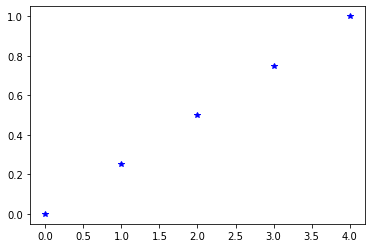

In [37]:
# np.linspace() 메소드는 start 부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만든다.
# np.linspace(start, stop, num[, endpoint, retstep, dtype])
# 요소의 개수를 기준으로 균등 간격 배열을 생성한다.
a = np.linspace(0, 1, 5)
pprint(a)
# np.linspace() 메소드 실행 결과 시각화
plt.plot(a, 'b*')
plt.show()